<a href="https://colab.research.google.com/github/ibonetc/VisionAPI_TensorFlow_Python/blob/master/IA_AssociationRules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reglas de Asociación


## Algoritmo Apriori

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=8ed5e9ad3242c38fc71c724fda1df3205181c720c78c963ec51315b17df2ba72
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


### Biblioteca apyori

In [3]:
from apyori import apriori

Vamos a cargar unos datos de ejemplo, donde cada fila es una transacción de compra de prodructos, por lo que cada fila tiene cantidad de elementos diferentes.

In [4]:
store_data = pd.read_csv('/content/drive/MyDrive/Datasets/store_data.csv',header=None)

In [5]:
store_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Preprocesar datos

In [6]:
records=[j.astype('str') for j in store_data.values]
records[0]

array(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
       'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
       'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
       'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
       'spinach', 'olive oil'], dtype='<U17')

#### Aplicar algoritmo Apriori

In [7]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [8]:
print(len(association_results))

48


In [9]:
association_results[0]

RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])

### Biblioteca mlxtend

In [10]:
from mlxtend.frequent_patterns import apriori, association_rules

In [11]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/retail_dataset.csv')
data

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
310,Bread,Eggs,Cheese,NaN,NaN,NaN,NaN
311,Meat,Milk,Pencil,NaN,NaN,NaN,NaN
312,Bread,Cheese,Eggs,Meat,Pencil,Diaper,Wine
313,Meat,Cheese,NaN,NaN,NaN,NaN,NaN


In [12]:
setItems=set()
for col in data:
  setItems.update(data[col].unique())
setItems

{'Bagel',
 'Bread',
 'Cheese',
 'Diaper',
 'Eggs',
 'Meat',
 'Milk',
 'Pencil',
 'Wine',
 nan}

In [13]:
x=set({np.nan})
setItems=setItems-x
setItems

{'Bagel',
 'Bread',
 'Cheese',
 'Diaper',
 'Eggs',
 'Meat',
 'Milk',
 'Pencil',
 'Wine'}

#### One Hot Encoding

In [14]:
binary_val = []
for c, r in data.iterrows():
    rowset = set(r) 
    binary_row=[]
    commons = list(setItems.intersection(rowset))
    binary_row=[1 if s in commons else 0 for i,s in enumerate(setItems)]
    binary_val.append(binary_row)
binary_val[0]
ohe_df = pd.DataFrame(binary_val,columns=list(setItems))

In [15]:
ohe_df

,Pencil,Bread,Meat,Diaper,Cheese,Eggs,Bagel,Wine,Milk
0,1,1,1,1,1,1,0,1,0
1,1,1,1,1,1,0,0,1,1
2,0,0,1,0,1,1,0,1,1
3,0,0,1,0,1,1,0,1,1
4,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
310,0,1,0,0,1,1,0,0,0
311,1,0,1,0,0,0,0,0,1
312,1,1,1,1,1,1,0,1,0
313,0,0,1,0,1,0,0,0,0


Ya en la biblioteca la transformación


In [16]:
from mlxtend.preprocessing import TransactionEncoder

Tener los datos en un arreglo de arreglos, donde cada elemento es una transacción

In [17]:
records_data=[x.astype('str') for x in data.values]

In [18]:
te = TransactionEncoder()
te_ary = te.fit(records_data).transform(records_data)
df = pd.DataFrame(te_ary, columns=te.columns_)   
df.pop('nan')   

0      False
1      False
2       True
3       True
4       True
       ...  
310     True
311     True
312    False
313     True
314     True
Name: nan, Length: 315, dtype: bool

In [19]:
df

,Bagel,Bread,Cheese,Diaper,Eggs,Meat,Milk,Pencil,Wine
0,False,True,True,True,True,True,False,True,True
1,False,True,True,True,False,True,True,True,True
2,False,False,True,False,True,True,True,False,True
3,False,False,True,False,True,True,True,False,True
4,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...
310,False,True,True,False,True,False,False,False,False
311,False,False,False,False,False,True,True,True,False
312,False,True,True,True,True,True,False,True,True
313,False,False,True,False,False,True,False,False,False


In [20]:
te_ary.astype("int")

array([[0, 1, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 1, 1]])

In [32]:
te = TransactionEncoder()
te_ary = te.fit(records_data).transform(records_data)
te_ary=te_ary.astype("int")
df = pd.DataFrame(te_ary, columns=te.columns_)   
df.pop('nan')
df

,Bagel,Bread,Cheese,Diaper,Eggs,Meat,Milk,Pencil,Wine
0,0,1,1,1,1,1,0,1,1
1,0,1,1,1,0,1,1,1,1
2,0,0,1,0,1,1,1,0,1
3,0,0,1,0,1,1,1,0,1
4,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,1,0,0,0,0
311,0,0,0,0,0,1,1,1,0
312,0,1,1,1,1,1,0,1,1
313,0,0,1,0,0,1,0,0,0


In [21]:
freq_items_ohe = apriori(ohe_df, min_support=0.2, use_colnames=True)
freq_items_ohe.head(7)

,support,itemsets
0,0.361905,(Pencil)
1,0.504762,(Bread)
2,0.476190,(Meat)
3,0.406349,(Diaper)
4,0.501587,(Cheese)
5,0.438095,(Eggs)
6,0.425397,(Bagel)


In [22]:
#apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)
freq_items = apriori(df, min_support=0.2, use_colnames=True)
freq_items.head(7)

,support,itemsets
0,0.425397,(Bagel)
1,0.504762,(Bread)
2,0.501587,(Cheese)
3,0.406349,(Diaper)
4,0.438095,(Eggs)
5,0.476190,(Meat)
6,0.501587,(Milk)


In [23]:
rules = association_rules(freq_items_ohe, metric="confidence", min_threshold=0.7)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Cheese, Eggs)",(Meat),0.298413,0.476190,0.215873,0.723404,1.519149,0.073772,1.893773
1,"(Meat, Eggs)",(Cheese),0.266667,0.501587,0.215873,0.809524,1.613924,0.082116,2.616667
2,"(Meat, Milk)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137


In [24]:
#association_rules(df, metric=’confidence’, min_threshold=0.8, support_only=False)
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
1,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
2,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
3,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
4,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148


In [25]:
rules = association_rules(freq_items, metric="lift", min_threshold=1.2)
print (rules)

       antecedents     consequents  ...  leverage  conviction
0          (Bread)         (Bagel)  ...  0.064641    1.286787
1          (Bagel)         (Bread)  ...  0.064641    1.442650
2         (Cheese)          (Eggs)  ...  0.078670    1.387202
3           (Eggs)        (Cheese)  ...  0.078670    1.563203
4           (Meat)        (Cheese)  ...  0.084958    1.557540
5         (Cheese)          (Meat)  ...  0.084958    1.477891
6         (Cheese)          (Milk)  ...  0.053172    1.270148
7           (Milk)        (Cheese)  ...  0.053172    1.270148
8           (Wine)        (Cheese)  ...  0.050098    1.297754
9         (Cheese)          (Wine)  ...  0.050098    1.216177
10          (Wine)        (Diaper)  ...  0.056901    1.280060
11        (Diaper)          (Wine)  ...  0.056901    1.331922
12          (Meat)          (Eggs)  ...  0.058050    1.277056
13          (Eggs)          (Meat)  ...  0.058050    1.338624
14          (Wine)          (Eggs)  ...  0.049342    1.250691
15      

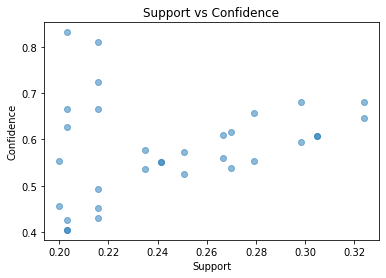

In [26]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

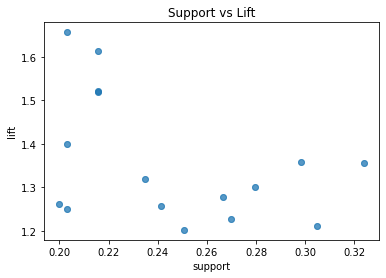

In [27]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

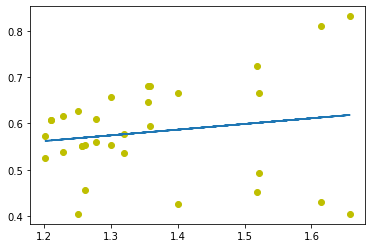

In [28]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

In [29]:
import networkx as nx 